# Movie Dataset Analysis 🎬
## 1. Introduction
## 2. Data Cleaning
## 3. Exploratory Data Analysis (EDA)
## 4. Conclusion



## 1. Introduction

# 🎬 Movie Data Analysis Project

## 📊 Objective
This project aims to explore, clean, and analyze a dataset of movies to uncover patterns and insights related to production budgets, revenue, ratings, and other key features. It also serves as a portfolio piece to demonstrate data cleaning, feature engineering, and exploratory data analysis (EDA) skills.

---

## 🧹 Data Cleaning Steps
- Handled missing values based on data types and distributions:
  - Used **mean**, **median**, or **mode** based on skewness for numerical columns.
  - Imputed categorical columns using the **mode**.
- Converted release dates to datetime and handled missing date values using the **year**.
- Detected and addressed **outliers** using:
  - IQR method for detection.
  - **Log transformation** for highly skewed columns (`budget`, `votes`, `gross`).


---

## 📊 Exploratory Data Analysis (EDA)
- Explored distributions of transformed numerical features.
- Create a heatmap showing correlation between numerical columns.
- Create  scatter plots to visulize the relationship betwween budget_log and otther features.
- Create a map to show number of movies by country.


---

## ✅ Tools Used
- Python 🐍 (Pandas, NumPy, Matplotlib, Seaborn)
- Jupyter Notebook 📓


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
df= pd.read_csv("movies.csv")

In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## 2. Data Cleaning

### Check for missing values

In [13]:

#Check for missing values
print(f" Number of missing percentage value for each columns are :\n{df.isnull().mean() *100}")
#check for the shape of the dataset:
print(f" The shape of the dataset is : {df.shape}")

 Number of missing percentage value for each columns are :
name              0.0
rating            0.0
genre             0.0
year              0.0
released          0.0
score             0.0
votes             0.0
director          0.0
writer            0.0
star              0.0
country           0.0
budget            0.0
gross             0.0
company           0.0
runtime           0.0
released_clean    0.0
votes_log         0.0
budget_log        0.0
gross_log         0.0
runtime_log       0.0
dtype: float64
 The shape of the dataset is : (7668, 20)


### Convert date columns
* We convert the date column to datetime, but before converting we need to clean the column so that it only contains the date part.
* After doing this we fill missing values using the year column.

In [5]:
#convert the 'released' column to datetime format.
# Remove extra text by splitting on '(' and keeping the first part
df['released_clean'] = df['released'].str.split('(').str[0].str.strip()


#fill missing dates using the year column
mask= df['released_clean'].isna()
df.loc[mask, 'released_clean']= pd.to_datetime(df.loc[mask, 'year'].astype(str)+ '-01-01', errors='coerce')


df['year'] = pd.to_datetime(df['year'], format='%Y')
print(df['released_clean'].isna().sum())

0


### Fill missing values with suitable imputation.
* It's essentail to consider the type of data in each column (numerical, categorical, or text)
* We will apply the implimention tip to all numerical columns in our dataset to dynamically decide wether to use the mean, median, or mode for imputing missing values.

In [6]:
#seprate columns into numerical and categorical
numerical_columns =df.select_dtypes(include=['int64', 'float64'])
categorical_columns= df.select_dtypes(include=['object'])
#impleminting for all numerical columns:
#Analyze and impute numerical columns based on their skewness
for col in numerical_columns.columns:
    if df[col].isna().sum() > 0: #check for missing values
        skewness= df[col].skew()
        if skewness > 0.5:
           df[col]= df[col].fillna(df[col].mean())
        elif skewness <-0.5:
            df[col]= df[col].fillna(df[col].median())
        else:
            df[col]= df[col].fillna(df[col].mode()[0])
        



We fill missing values in numerical columns based on skewness
*  If skewness > 0.5: right skewed --> fill with mean.
*  if skewness < -0.5: left skewed --> fill with median.
*  otherwise --> use mode.

In [7]:
#Analyze and impute categorical columns.
#check for missing count before filling 
print(f"Missing values in categorical columns\n: {df[categorical_columns.columns].isna().sum()}")

#fill missing values in categorical columns with the mode
for col in categorical_columns.columns:
    if df[col].isna().sum() > 0: 
        most_common= df[col].mode()
        if not most_common.empty:
            df[col]= df[col].fillna(most_common[0])
        else:
            df[col]= df[col].fillna(df['missing'])
#check for missig values after filling:
print(f"Missing values in categorical columns after filling\n : {df[categorical_columns.columns].isna().sum()}")



Missing values in categorical columns
: name               0
rating            77
genre              0
released           2
director           0
writer             3
star               1
country            3
company           17
released_clean     0
dtype: int64
Missing values in categorical columns after filling
 : name              0
rating            0
genre             0
released          0
director          0
writer            0
star              0
country           0
company           0
released_clean    0
dtype: int64


* Missing values in categorical columns were filled using the most frequant categoryto preserve consistency and a void data loss.

### Check for duplicated rows.

In [8]:
#check for completly duplicated rows
duplicated_rows= df[df.duplicated()]
print(f"number of duplicated rows : {duplicated_rows.shape[0]}")

number of duplicated rows : 0


### Handling outliers
It's an important step in data prepration process to ensure that extreme values don't distort the analysis or model performance.

In [9]:
#detect outliers (using IQR method)
for col in numerical_columns.columns:
    Q1 = df[col].quantile(0.25)
    Q3= df[col].quantile(0.75)
    IQR= Q3-Q1
    lower= Q1 - 1.5 * IQR
    upper= Q3- 1.5 * IQR
    outliers_count= ((df[col]< lower)| (df[col]> upper)).sum()
    print(f"number of outliers in {col}: {outliers_count}")

number of outliers in score: 7031
number of outliers in votes: 7668
number of outliers in budget: 7200
number of outliers in gross: 7668
number of outliers in runtime: 7343


In [14]:
# Check which columns are skewed and positive
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    if (df[col] > 0).all():  # check for positive values only
        skew = df[col].skew()
        if abs(skew) > 1:
            # Create a new column with log-transformed values
            df[f'{col}_log'] = df[col].apply(lambda x: np.log(x) if x > 0 else 0)
            print(f"{col} is skewed ({round(skew, 2)}), created: {col}_log")


votes is skewed (4.91), created: votes_log
budget is skewed (2.9), created: budget_log
gross is skewed (5.38), created: gross_log
runtime is skewed (2.1), created: runtime_log
budget_log is skewed (-1.74), created: budget_log_log


* We detected outliers using the IQR method for each numerical feature.

* To reduce the effect of extreme values, we applied a log transformation method to the budget, gross, and votes columns, which helped normalize the distribution and improve model performance.

* Although the IQR method flagged many values in the score column as outliers, this is due to the inherent narrow range of the rating scale. Therefore, we decided to preserve the original score values, as they appropriately reflect the data


## 3. Exploratory Data Analysis (EDA)

### Basic info and overview 




In [15]:

print('Summary statistics for numerical columns:')
display(df.describe())

print("\n" + "*" * 15)
print('Summary statistics for categorical columns:')
display(df.describe(include=['object']))


Summary statistics for numerical columns:


,year,score,votes,budget,gross,runtime,votes_log,budget_log,gross_log,runtime_log,budget_log_log
count,7668,7668.000000,7.668000e+03,7.668000e+03,7.668000e+03,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000
mean,2000-05-28 11:12:40.563380480,6.390454,8.810850e+04,3.558988e+07,7.850054e+07,107.261613,10.230917,16.927257,16.607443,4.662133,2.826299
min,1980-01-01 00:00:00,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000,1.945910,8.006368,5.733341,4.007333,2.080237
25%,1991-01-01 00:00:00,5.800000,9.100000e+03,1.400000e+07,4.681151e+06,95.000000,9.116030,16.454568,15.359055,4.553877,2.800603
50%,2000-01-01 00:00:00,6.500000,3.300000e+04,3.558988e+07,2.141330e+07,104.000000,10.404263,17.387572,16.879523,4.644391,2.855756
75%,2010-01-01 00:00:00,7.100000,9.300000e+04,3.558988e+07,7.850054e+07,116.000000,11.440355,17.387572,18.178616,4.753590,2.855756
max,2020-01-01 00:00:00,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000,14.690979,19.690441,21.769618,5.902633,2.980133
std,NaN,0.968654,1.632918e+05,3.510036e+07,1.636697e+08,18.576400,1.703554,1.164248,2.199457,0.158070,0.074617



***************
Summary statistics for categorical columns:


,name,rating,genre,released,director,writer,star,country,company,released_clean
count,7668,7668,7668,7668,7668,7668,7668,7668,7668,7668
unique,7512,12,19,3414,2949,4535,2814,59,2385,2956
top,Nobody's Fool,R,Comedy,"February 14, 1986 (United States)",Woody Allen,Woody Allen,Nicolas Cage,United States,Universal Pictures,"October 4, 1991"
freq,3,3774,2245,11,38,40,44,5478,394,9


In [16]:
#check data types and non-null counts
print(df.info())
#Check for nan values in the dataset
print (f"Number of missing values in all dataset :{df.isna().sum().sum()}, and number of duplicated rows : {df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            7668 non-null   object        
 1   rating          7668 non-null   object        
 2   genre           7668 non-null   object        
 3   year            7668 non-null   datetime64[ns]
 4   released        7668 non-null   object        
 5   score           7668 non-null   float64       
 6   votes           7668 non-null   float64       
 7   director        7668 non-null   object        
 8   writer          7668 non-null   object        
 9   star            7668 non-null   object        
 10  country         7668 non-null   object        
 11  budget          7668 non-null   float64       
 12  gross           7668 non-null   float64       
 13  company         7668 non-null   object        
 14  runtime         7668 non-null   float64       
 15  rele

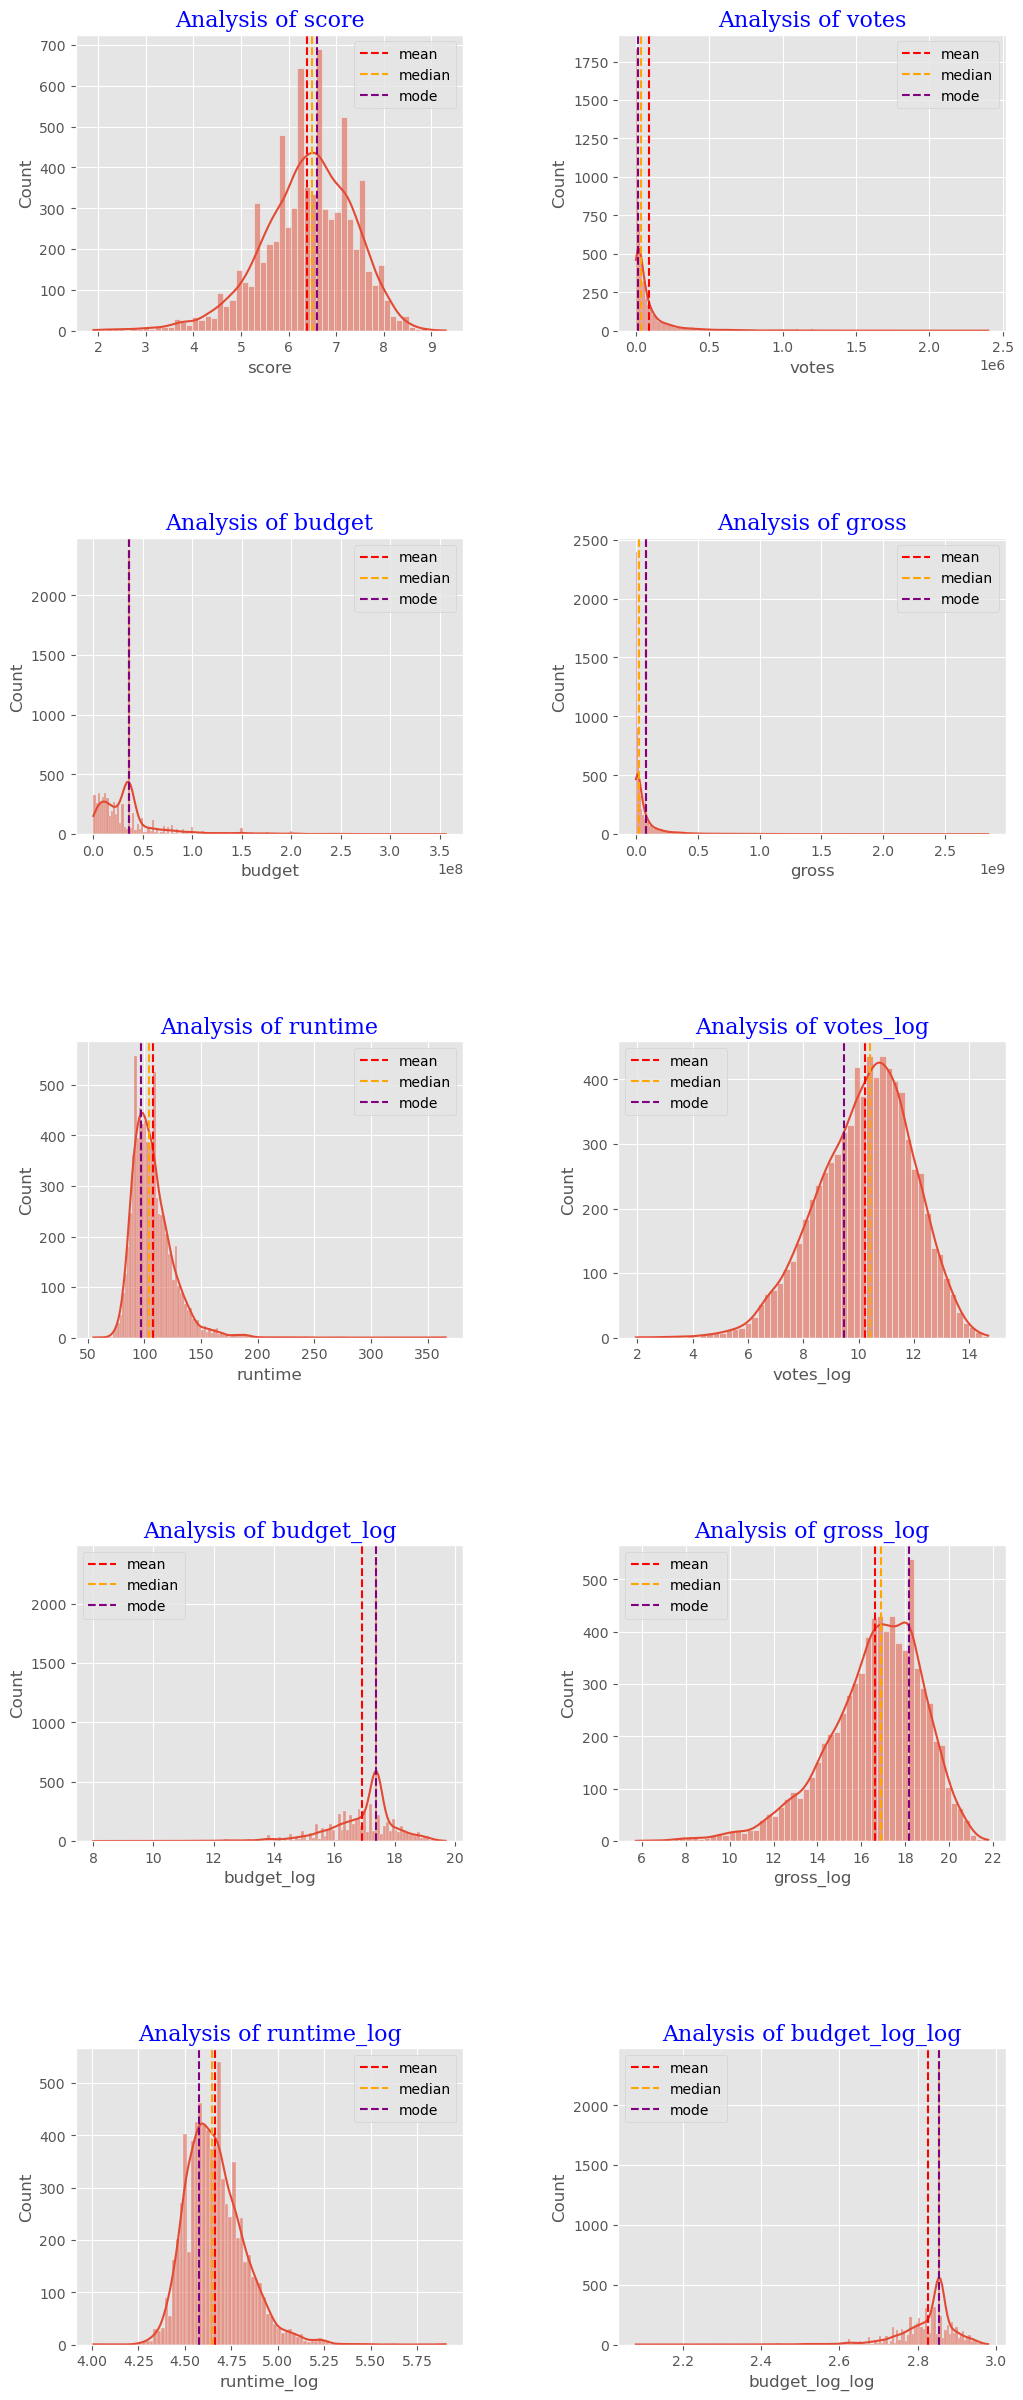

In [26]:
# Distribution for numerical columns:
#num_cols = ['score', 'runtime_log', 'votes_log', 'gross_log', 'budget_log']
num_cols= df.select_dtypes(include=['int64', 'float64']).columns.tolist()

def generate_distribution_plots(df):
    # Create subplots
    num_plots = len(num_cols)
    fig, axes = plt.subplots(nrows=(num_plots + 1) // 2, ncols=2, figsize=(12, 6 * ((num_plots + 1) // 2)))
    fig.subplots_adjust(hspace=0.7, wspace=0.4)
    # Set font dictionary
    font = {'family': 'serif', 'color': 'blue', 'weight': 'normal', 'size': 16}
    # Generate distribution plots
    for ax, col in zip(axes.flatten(), num_cols):
        col_mean = df[col].mean()
        col_median = df[col].median()
        col_mode = df[col].mode()[0]
        sns.histplot(df[col], kde=True, ax=ax)
        ax.set_title(f'Analysis of {col}', fontdict=font)
        ax.axvline(col_mean, color='red', linestyle='--', label='mean')
        ax.axvline(col_median, color='orange', linestyle='--', label='median')
        ax.axvline(col_mode, color='purple', linestyle='--', label='mode')
        ax.legend()
    # If there are empty subplots (because the number of cols is odd), hide them:
    if num_plots % 2 != 0:
        axes.flatten()[-1].set_visible(False)
    plt.show()

generate_distribution_plots(df)

    
    


**Score:**
- The distribution appears fairly symmetric, with most scored clustered between 5 and 8.
- The mean, median ,and mode are closed together, indicating low skewness.
- A few or high scores exist but are within reasonable bounds.

**Runtime_log, votes_log, gross_log, and budget_log:**
- The distribution is more balanced after log_transformation.
- The transformation has helped compress extreme values, showing a better normalized distribution.


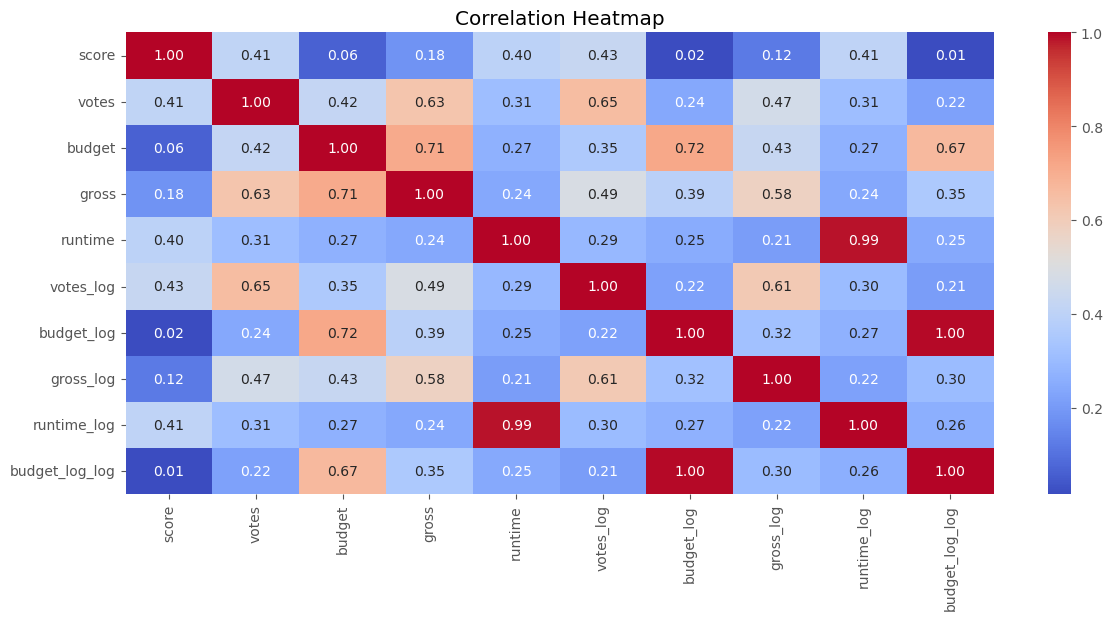

In [27]:
# Create a heatmap showing correlation between numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(14,6))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### 📊 Correlation Insights: Raw vs. Log-Transformed Features

We observe a strong correlation (0.71) between `budget` and `gross` in their original form. However, after applying a log transformation, the correlation between `budget_log` and `gross_log` drops significantly to around 0.31.

This difference occurs because:

- The original correlation is heavily influenced by a few extremely high-budget and high-grossing movies.
- Log transformation reduces the impact of these outliers, normalizes the data, and reveals a more balanced view of the relationship.
- It suggests that while large budgets can lead to high returns, the relationship across all movies is more modest and complex.

This emphasizes the importance of transformation when analyzing financial features in skewed datasets like movie data.


###  scatter plots to visulize the relationship between budget_log and other features 

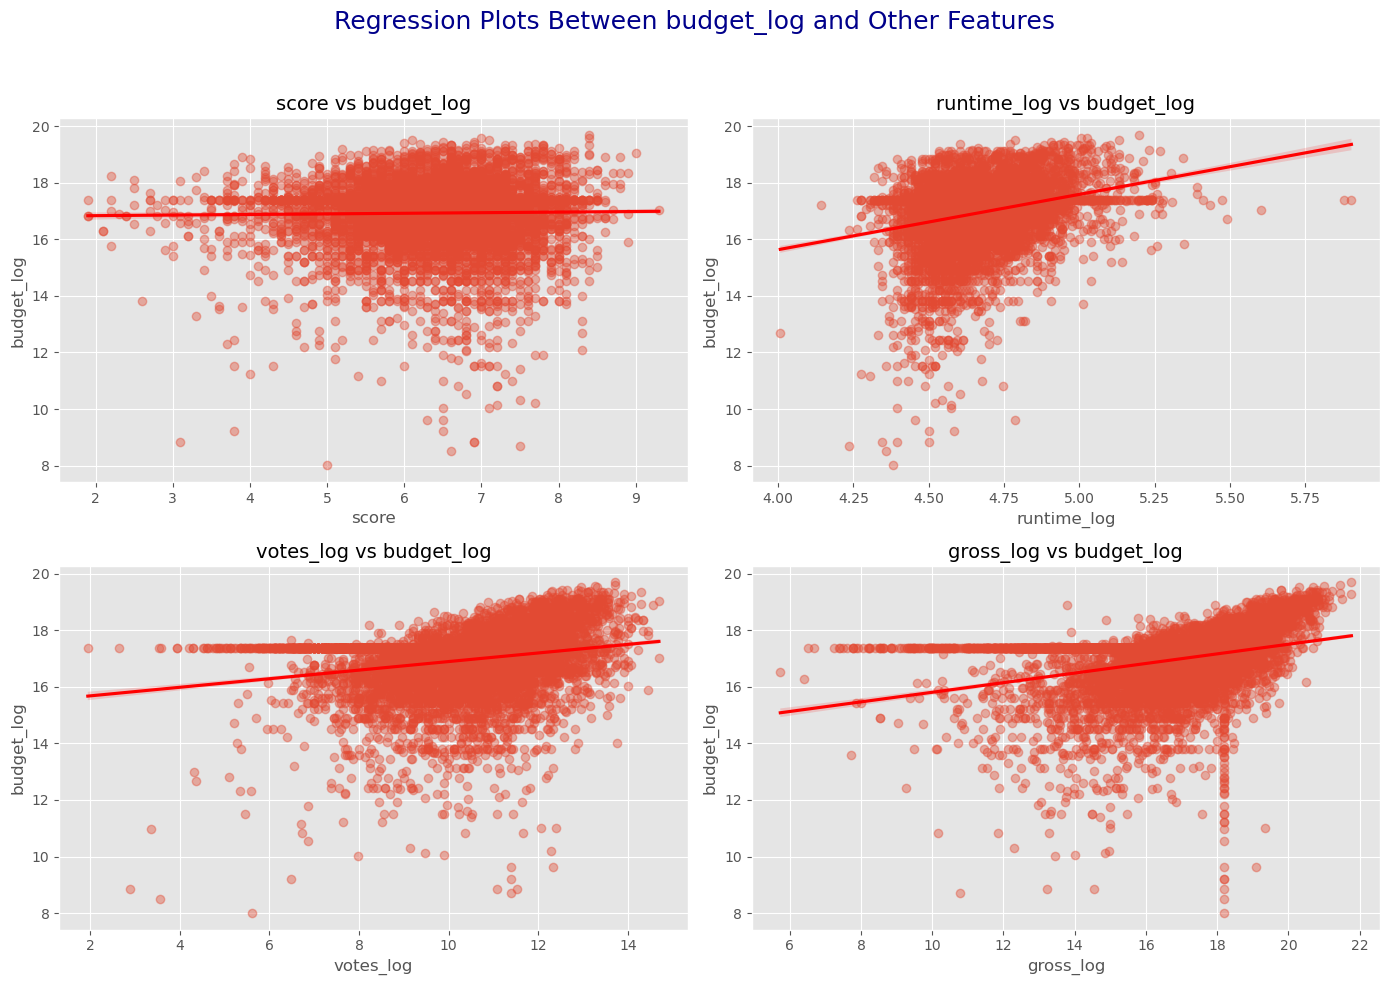

In [44]:
# Create  scatter plots to visulize the relationship betwween budget_log and other features 

# Features to compare with budget_log
num_cols_ = ['score', 'runtime_log', 'votes_log', 'gross_log']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Regression Plots Between budget_log and Other Features', fontsize=18, color='darkblue')

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot each regression
for i, col in enumerate(num_cols_):
    sns.regplot(x=df[col], y=df['budget_log'], ax=axes[i], scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
    axes[i].set_title(f'{col} vs budget_log', fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('budget_log')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the suptitle
plt.savefig('images/Regression Plots Between budget_log and Other Features.png', bbox_inches='tight')
plt.show()


### 🔍 Visualizing Relationships with `budget_log`

The regression plots  are showing us the relationship between the transformed budget and other important features in the dataset:

- `score`: No clear trend; scores are not strongly influenced by budget.
- `runtime_log`: Weak positive trend; high-budget films tend to run longer.
- `votes_log`: Positive correlation; more budget often means more visibility and votes.
- `gross_log`: weak positive trend; higher budgets are associated with higher earnings.


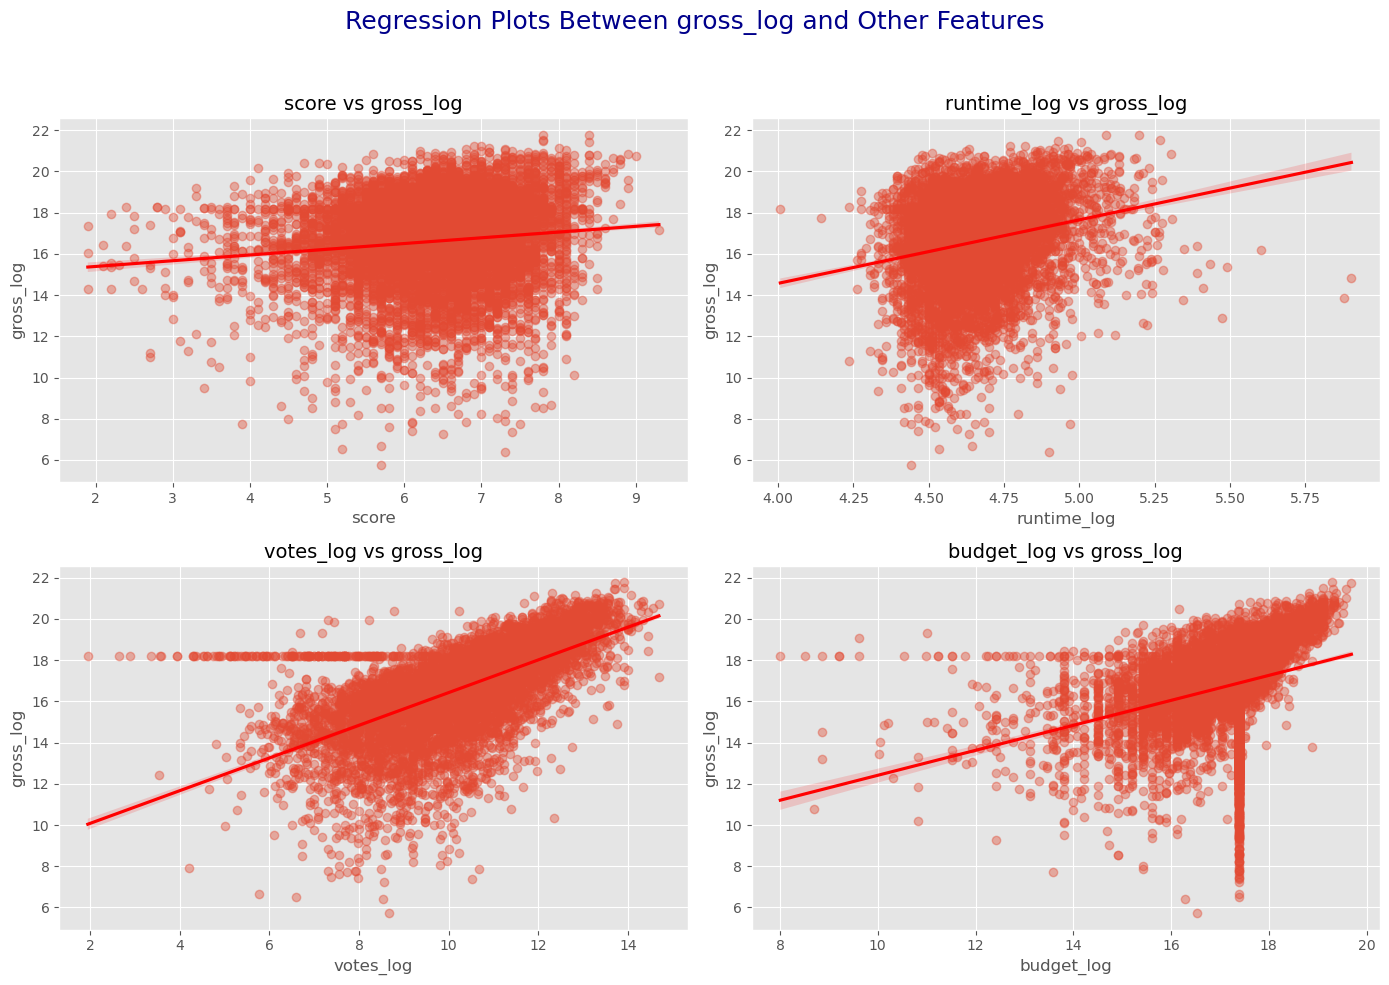

In [29]:
# Create  scatter plots to visulize the relationship betwween gross_log and other features 

# Features to compare with budget_log
num_cols_ = ['score', 'runtime_log', 'votes_log', 'budget_log']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Regression Plots Between gross_log and Other Features', fontsize=18, color='darkblue')

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot each regression
for i, col in enumerate(num_cols_):
    sns.regplot(x=df[col], y=df['gross_log'], ax=axes[i], scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
    axes[i].set_title(f'{col} vs gross_log', fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('gross_log')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the suptitle
plt.show()


### 🔍 Visualizing Relationships with `gross_log`

The regression plots  are showing us the relationship between the transformed gross and other important features in the dataset:

- `score`: No clear trend; scores are not strongly influenced by scores.
- `runtime_log`: Weak positive trend; high-gross films tend to run longer.
- `votes_log`: Positive correlation; more gross often means more visibility and votes.



### Line plot for budget and gross over the years

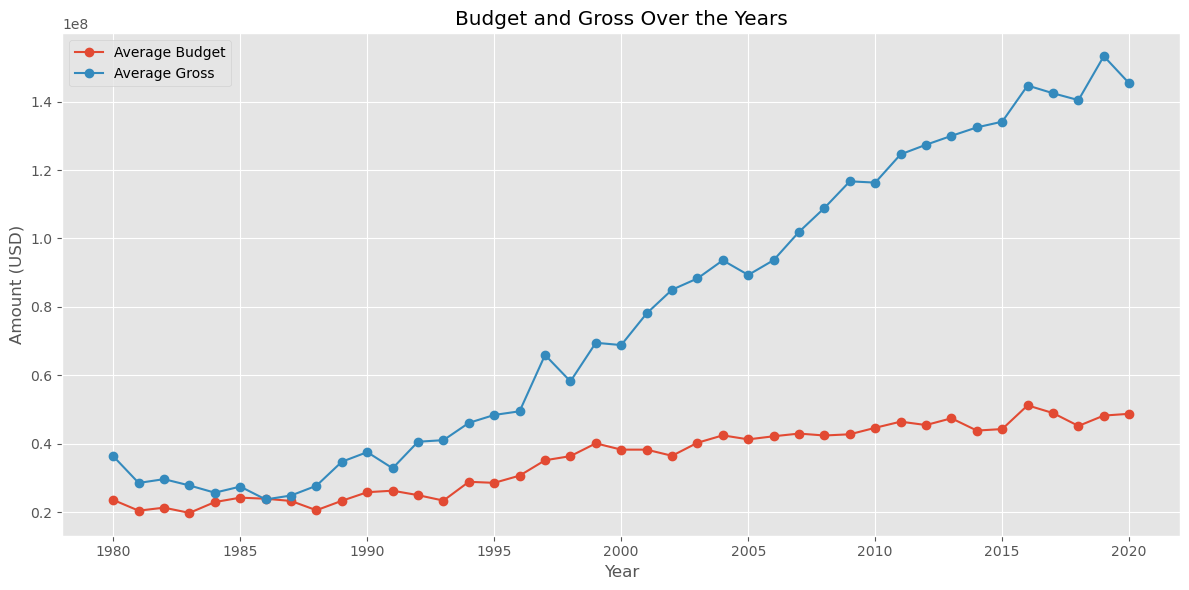

In [45]:
import matplotlib.pyplot as plt

# Group by year to get average budget and gross
df_yearly = df.groupby('year')[['budget', 'gross']].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_yearly['year'], df_yearly['budget'], label='Average Budget', marker='o')
plt.plot(df_yearly['year'], df_yearly['gross'], label='Average Gross', marker='o')

plt.title('Budget and Gross Over the Years')
plt.xlabel('Year')
plt.ylabel('Amount (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('images/Budget and Gross Over the Years.png', bbox_inches='tight')
plt.show()


We can observe that the gap between average gross and average budget has widened over the years, indicating that films are generating increasingly higher revenues relative to their budgets


### Line plot for average gross revenue over the years by genre 

In [46]:
import pandas as pd
import plotly.express as px

# Step 1: Group by year and genre to calculate average budget and gross
df_genre_year = df.groupby(['year', 'genre'])[['budget', 'gross']].mean().reset_index()

# Step 2: Filter to only the last 10 years
latest_years = sorted(df['year'].unique())[-10:]
df_genre_year = df_genre_year[df_genre_year['year'].isin(latest_years)]

# Step 3: Get top 10 genres with the highest total gross
top_genres = df.groupby('genre')['gross'].sum().nlargest(10).index
df_genre_year = df_genre_year[df_genre_year['genre'].isin(top_genres)]

# Step 4: Plot with Plotly
fig = px.line(
    df_genre_year,
    x='year',
    y='gross',
    color='genre',
    title='🎬 Average Gross Revenue (Top 10 Genres) Over the Last 10 Years',
    labels={'gross': 'Average Gross (USD)', 'year': 'Year'},
    markers=True
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Gross Revenue (USD)',
    legend_title='Genre',
    template='plotly_white',
    hovermode='x unified',
    title_font=dict(size=20, color='darkblue'),
    legend=dict(x=0.01, y=0.99, borderwidth=1)
)

plt.savefig('images/Average Gross Revenue (Top 10 Genres) Over the Last 10 Years.png', bbox_inches='tight')
fig.show()


In [47]:
# Get  top 10  movies name, genre, star, and company by budget
max_budget= df[['name','genre','star','company','budget']].sort_values(by='budget', ascending=False).head(10)
for index, row in max_budget.iterrows():
    print(f"movie: {row['name']}, genre: {row['genre']}, star: {row['star']}, company: {row['company']}, budget: {row['budget']}")
    print("-*"*20)



movie: Avengers: Endgame, genre: Action, star: Robert Downey Jr., company: Marvel Studios, budget: 356000000.0
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
movie: Avengers: Infinity War, genre: Action, star: Robert Downey Jr., company: Marvel Studios, budget: 321000000.0
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
movie: Star Wars: Episode VIII - The Last Jedi, genre: Action, star: Daisy Ridley, company: Walt Disney Pictures, budget: 317000000.0
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
movie: Pirates of the Caribbean: at World's End, genre: Action, star: Johnny Depp, company: Walt Disney Pictures, budget: 300000000.0
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
movie: Justice League, genre: Action, star: Ben Affleck, company: Warner Bros., budget: 300000000.0
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
movie: Star Wars: Episode IX - The Rise of Skywalker, genre: Action, star: Daisy Ridley, company: Walt Disney Pictures, budget: 275000000.0
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
movie: Solo: A Star

In [48]:
# Get  top 10  movies name, genre, star, and company by gross
max_gross= df[['name','genre','star','company','gross']].sort_values(by='gross', ascending=False).head(10)
for index, row in max_gross.iterrows():
    print(f"movie: {row['name']}, genre: {row['genre']}, star: {row['star']}, company: {row['company']}, gross: {row['gross']}")
    print("-*"*20)

movie: Avatar, genre: Action, star: Sam Worthington, company: Twentieth Century Fox, gross: 2847246203.0
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
movie: Avengers: Endgame, genre: Action, star: Robert Downey Jr., company: Marvel Studios, gross: 2797501328.0
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
movie: Titanic, genre: Drama, star: Leonardo DiCaprio, company: Twentieth Century Fox, gross: 2201647264.0
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
movie: Star Wars: Episode VII - The Force Awakens, genre: Action, star: Daisy Ridley, company: Lucasfilm, gross: 2069521700.0
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
movie: Avengers: Infinity War, genre: Action, star: Robert Downey Jr., company: Marvel Studios, gross: 2048359754.0
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
movie: The Lion King, genre: Animation, star: Donald Glover, company: Walt Disney Pictures, gross: 1670727580.0
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
movie: Jurassic World, genre: Action, star: Chris Pratt, company: Universal P

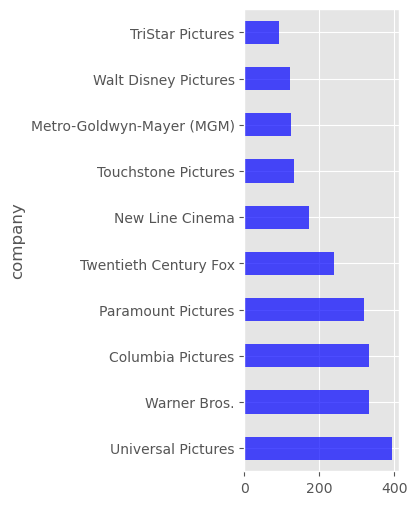

In [49]:
# Get top 10 campanies by number of movies
df['company'].value_counts().head(10).plot(kind='barh', figsize=(2,6), color='blue', alpha=0.7)
plt.show()

In [54]:
# Get the top 10 genres by budget
top_10_genres= df.groupby('genre')['budget'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(12,6))
plt.title('Top 10 Genres by Budget')
plt.savefigplt.savefig('images/Top 10 Genres by Budget.png', bbox_inches='tight')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'savefigplt'

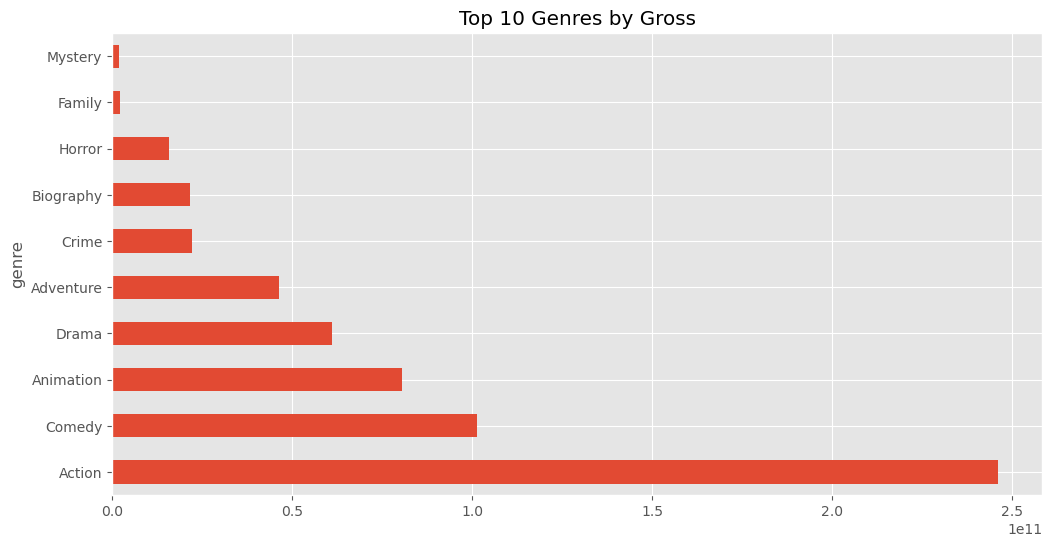

In [51]:
# Get the top 10 genres by gross
top_10_genres= df.groupby('genre')['gross'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(12,6))
plt.title('Top 10 Genres by Gross')
plt.show()

In [52]:
# Movies by nationality map
import plotly.express as px

# Count the number of movies by country (assuming the column is called 'country')
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'movie_count']

# Create choropleth map
fig = px.choropleth(country_counts,
                    locations='country',
                    locationmode='country names',
                    color='movie_count',
                    color_continuous_scale='plasma',
                    title='Number of Movies by Country')

fig.update_layout(geo=dict(showframe=False, showcoastlines=True))
plt.savefig('images/Number of Movies by Country.png', bbox_inches='tight')
fig.show()


In [53]:

# Count the number of movies by genre
genre_count = df['genre'].value_counts().reset_index()
genre_count.columns= ['genre','movie_count']
# create a bar plot
fig = px.bar(genre_count, x='genre', y='movie_count', title='Number of Movies by Genre')
fig.update_layout(xaxis_title='Genre', yaxis_title='Number of Movies')
fig.show()

## 4. Conclusion

# 📑 Final Conclusion

---

### 🛠 **Project Overview**
In this project, we performed a comprehensive exploratory data analysis on a movie dataset to uncover patterns and relationships among various features such as **budget**, **gross earnings**, **votes**, **scores**, and more.

---

## 🧹 **Data Cleaning Process**
- 📅 Converted the `date` column to **datetime** format and extracted the date.
- 🛠 Applied a dynamic imputation strategy for **numerical columns**, choosing between **mean**, **median**, or **mode** based on distribution shape.
- 🧩 Filled missing values in **categorical columns** using the **mode** to maintain data consistency.
- 🚀 Addressed skewed features by applying **log transformations** to **budget**, **gross**, **votes**, and **runtime**.
- 🧮 **Note on log transformation:**  
  - While it improved the distribution, it also slightly reduced correlation values — a natural effect of compressing extreme values.

---

## 🛠️ **Data Challenges and Solutions**

| Challenge                     | Solution                                    |
|:-------------------------------|:-------------------------------------------|
| Missing values                 | Imputed using mean/median/mode              |
| Extreme outliers in numerical columns | Applied log transformations           |
| Skewed distributions           | Performed log transformation               |
| Wide range of genres           | Focused on top-performing genres           |

---

## 📊 **Key Results and Insights**
- 💰 A **strong positive correlation** was found between **budget** and **gross earnings**.
- 📈 The **gap between budget and gross** widened over the years, indicating increasing profitability.
- 🌟 Higher **votes** are associated with higher **gross earnings**.
- 🎬 **Top genres by budget and gross** are **Action**, **Comedy**, and **Animation**.

---

# 🎯 **Final Thoughts**
Through careful **data cleaning**, **transformation**, and **visualization**, we revealed how movie industry patterns evolved over time.  
This project showcases the importance of **data preprocessing** in producing meaningful, reliable insights.

---

✨ _This project is an important addition to my data analysis portfolio, highlighting my ability to clean, transform, and analyze real-world datasets._


In [50]:
df.to_csv('movies_cleaned.csv', index=False)
